# MWT - Data Science - wiki4HE

Il set di dati __wiki4HE__ contiene informazioni su un questionario proposto a dei professori universitari, ai quali è stato chiesto di rispondere a delle domande sull'utilizzo di Wikipedia come risorsa didattica.

Il dataset è composto da due sottoinsiemi contenenti i dati demografici degli intervistati e le relative risposte alle domande poste loro.
I professori che si sono sottoposti al sondaggio appartengono a due diverse università spagnole, ovvero la _Universitat Oberta de Catalunya_ e la _Universitat Pompeu Fabra_, e sono specializzati in diversi ambiti accademici.
La scala dei valori delle risposte all'indagine variano da 1 a 5, dove 1 rappresenta il totale disaccordo con l'affermazione e 5 il viceversa.

Il lavoro su questo dataset si suddividerà in steps nei quali si analizzeranno i dati, in seguito questi verranno combinati così da incrementare le informazioni a disposizione per l'addestramento ed infine verrà eseguita una gestione degli eventuali dati mancanti.
Ci si soffermerà anche sul confronto fra le funzioni ottimizzate delle librerie importate e alcune funzioni, dichiarate in Python sfruttando il linguaggio e i suoi costrutti, che vanno a simulare le prime.

Lo scopo ultimo di questo elaborato è quello di utilizzare questo dataset per l'addestramento di una macchina capace di predirre le risposte sull'utilizzo di Wikipedia come stumento per l'integrazione del materiale didattico da parte degli studenti, questo sarà possibile analizzando le caratteristiche dei professori e delle risposte date da ognuno di essi.
Nel dataset sono presenti domande specifiche che danno una risposta all'obiettivo della predizione, per questo motivo verranno escluse dal set di dati utilizato per l'addestramento.

## Indice:
1. Import del Dataset e analisi preliminari
2. Manipolazione e pulizia (Data Wrangling)
    1. Valutazione dei NaN
    2. Divisione del set
        1. Professori
        2. Questionario
3. Preparazione Modello ML



# Import del Dataset e analisi preliminari
Dopo aver importato il dataset, è stato sostituito il carattere "?" che rappresenta una risposta mancante con il valore NaN di numpy.

Viene eseguita una stampa dei primi campioni per ottenere una visione generica del dataset che si sta analizzando e in seguito vengono stampate le informazioni generali relative alla dimensione e ai tipi di ogni attributo del set di dati.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import main

data = pd.read_csv('dataset/uci - missing data/wiki4HE/wiki4HE.csv', sep=';')
pd.set_option('display.max_columns', 54)
data.replace('?', np.nan, inplace=True)
#stampa delle prime righe
print(data.head())

   AGE  GENDER DOMAIN  PhD YEARSEXP  UNIVERSITY UOC_POSITION OTHER_POSITION  \
0   40       0      2    1       14           1            2            NaN   
1   42       0      5    1       18           1            2            NaN   
2   37       0      4    1       13           1            3            NaN   
3   40       0      4    0       13           1            3            NaN   
4   51       0      6    0        8           1            3            NaN   

  OTHERSTATUS USERWIKI PU1 PU2 PU3 PEU1 PEU2 PEU3 ENJ1 ENJ2 Qu1 Qu2 Qu3 Qu4  \
0         NaN        0   4   4   3    5    5    3    4    4   3   3   2   2   
1         NaN        0   2   3   3    4    4    3    3    4   4   4   3   3   
2         NaN        0   2   2   2    4    4    3    3    3   2   2   2   5   
3         NaN        0   3   3   4    3    3    3    4    3   3   4   3   3   
4         NaN        1   4   3   5    5    4    3    4    4   4   5   4   3   

  Qu5 Vis1 Vis2 Vis3 Im1 Im2 Im3 SA1 SA2 SA3 Use1 

In [2]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          911 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        890 non-null    object
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    800 non-null    object
 7   OTHER_POSITION  652 non-null    object
 8   OTHERSTATUS     373 non-null    object
 9   USERWIKI        909 non-null    object
 10  PU1             906 non-null    object
 11  PU2             902 non-null    object
 12  PU3             908 non-null    object
 13  PEU1            909 non-null    object
 14  PEU2            899 non-null    object
 15  PEU3            816 non-null    object
 16  ENJ1            906 non-null    object
 17  ENJ2            896 non-null    object
 18  Qu1       


# Manipolazione e pulizia (Data Wrangling

##  Valutazione dei NaN

Ai fini dell'organizzazione del lavoro di pulizia, risulta interessante capire quanti e dove sono presenti i valori Nan.
Si puo notare che la maggior parte delle istanze ha almeno un valore NaN, per questo motivo risulta utile visionare il conteggio degli NaN per ogni attributo


In [3]:
# numero di righe con almeno un na:
data.shape[0] - data.dropna().shape[0]

737

In [4]:
#numero di na per ogni attributo
pd.DataFrame({ 'contain na ': data.isna().any() ,'number of na ': data.isna().sum() })

,contain na,number of na
AGE,False,0
GENDER,False,0
DOMAIN,True,2
PhD,False,0
YEARSEXP,True,23
UNIVERSITY,False,0
UOC_POSITION,True,113
OTHER_POSITION,True,261
OTHERSTATUS,True,540
USERWIKI,True,4


## Divisione del set

Data la struttura del dataset, è possibile lavorare separando i dati demografici dei professori dalle domande del questionario. Per questo motivo dividiamo il set in due sottoinsiemi che chiameremo ___"Prof"___ e ___"Questionario"___

In [5]:
prof = data.iloc[:, :10]
questionario = data.iloc[:, 10:]

## Professori

Questo sottoinsieme raccoglie varie informazioni relative ai professori:
- Età
- Genere
- Dominio
- Anni di esperienza da professore
- In possesso di PhD
- Università di appartenenza
- Posizione lavorativa ricoperta in UOC
- Se insegna in altri Istituiti Universitari
- Posizione lavorativa presso altre Università e dipendente di UPF
- Utente registrato su Wikipedia

Per avere una visione più puntale del sottoinsieme in lavorazione risulta essere vantaggioso la costruzione di plot descrittivi

### Grafici

[Text(0, 0, '0'),
 Text(10, 0, '10'),
 Text(20, 0, '20'),
 Text(30, 0, '30'),
 Text(40, 0, '40'),
 Text(50, 0, '50'),
 Text(60, 0, 'NaN')]

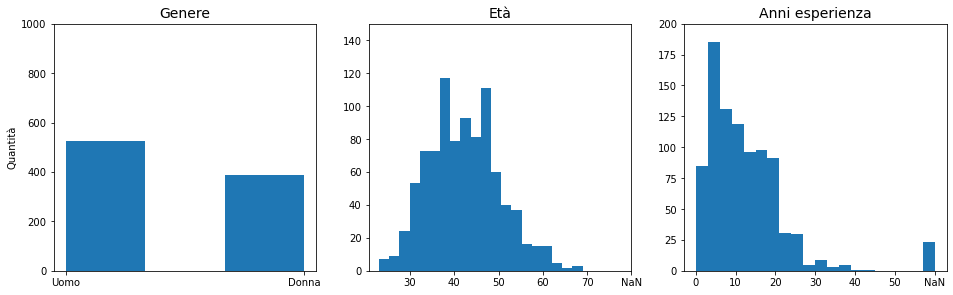

In [6]:
# GENDER #AGE YEARSEXP

fig = plt.figure(figsize = (16,10))

ax = fig.add_subplot(2, 3, 1)
counts, bins, patches = ax.hist(prof['GENDER'].map({0: 'Uomo', 1: 'Donna'}), bins = 3)
ax.set_title("Genere", fontsize = 14)
ax.set_ylabel("Quantità")
ax.set_ylim((0, 1000))

ax = fig.add_subplot(2, 3, 2)
ax.hist(prof['AGE'].fillna(80).astype(int), bins = 20)
ax.set_title("Età", fontsize = 14)
ax.set_ylim((0, 150))
ax.set_xticks([30, 40, 50, 60, 70, 80])
ax.set_xticklabels([30, 40, 50, 60, 70, "NaN"])

ax = fig.add_subplot(2, 3, 3)
ax.hist(prof['YEARSEXP'].fillna(60).astype(int), bins = 20)
ax.set_title("Anni esperienza", fontsize = 14)
ax.set_ylim((0, 200))
ax.set_xticks([0, 10, 20, 30, 40, 50, 60])
ax.set_xticklabels([0, 10, 20, 30, 40, 50, "NaN"])

[Text(0, 0, '0'),
 Text(0, 100, '100'),
 Text(0, 200, '200'),
 Text(0, 300, '300'),
 Text(0, 400, '>400')]

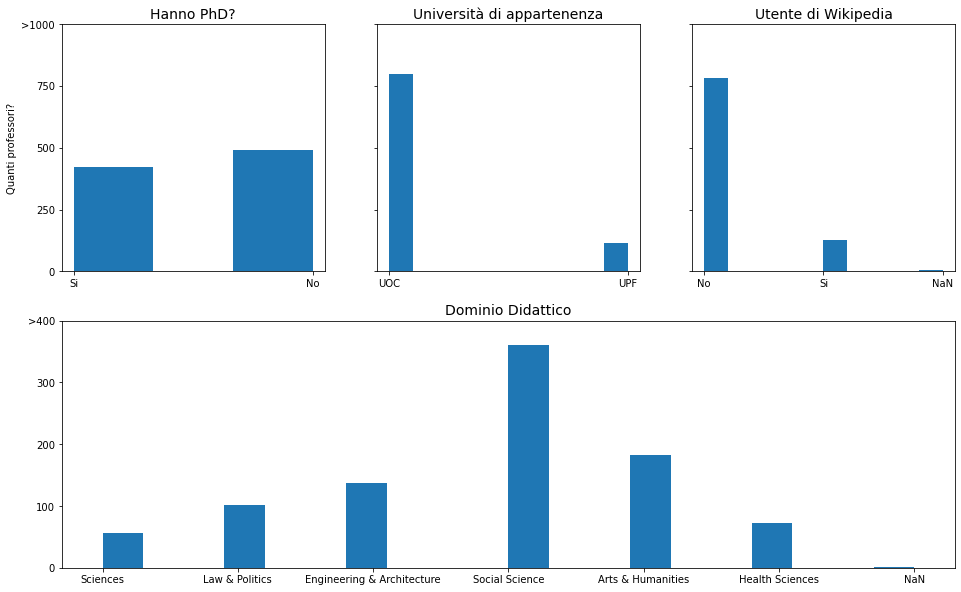

In [7]:
fig = plt.figure(figsize = (16,10))

ax = fig.add_subplot(2, 3, 1)
counts, bins, patches = ax.hist(prof['PhD'].map({0: 'No', 1: 'Si'}), bins = 3)
ax.set_title("Hanno PhD?", fontsize = 14)
ax.set_ylabel("Quanti professori?")
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([0, 250, 500, 750, ">1000"])

ax = fig.add_subplot(2, 3, 2)
ax.hist(prof['UNIVERSITY'].fillna(0).astype(int).map({0:'NaN', 1: 'UOC', 2: 'UPF'}), bins = 10)
ax.set_title("Università di appartenenza", fontsize = 14)
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([ "",  "",  "",  "", ""])

ax = fig.add_subplot(2, 3, 3)
ax.hist(prof['USERWIKI'].fillna(2).astype(int).map({0: 'No', 1: 'Si', 2:'NaN'}), bins = 10)
ax.set_title("Utente di Wikipedia", fontsize = 14)
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([ "",  "",  "",  "", ""])

ax = fig.add_subplot(2, 1, 2)
ax.hist(prof['DOMAIN'].fillna(7).astype(int).map({1: "Arts & Humanities", 2:"Sciences", 3:"Health Sciences",
                                   4:"Engineering & Architecture", 5:"Law & Politics",
                                   6:"Social Science", 7:'NaN'}), bins = 20)
ax.set_title("Dominio Didattico", fontsize = 14)
ax.set_ylim((0, 400))
ax.set_yticks([0, 100, 200, 300, 400])
ax.set_yticklabels([0, 100, 200, 300, ">400"])

(0.0, 800.0)

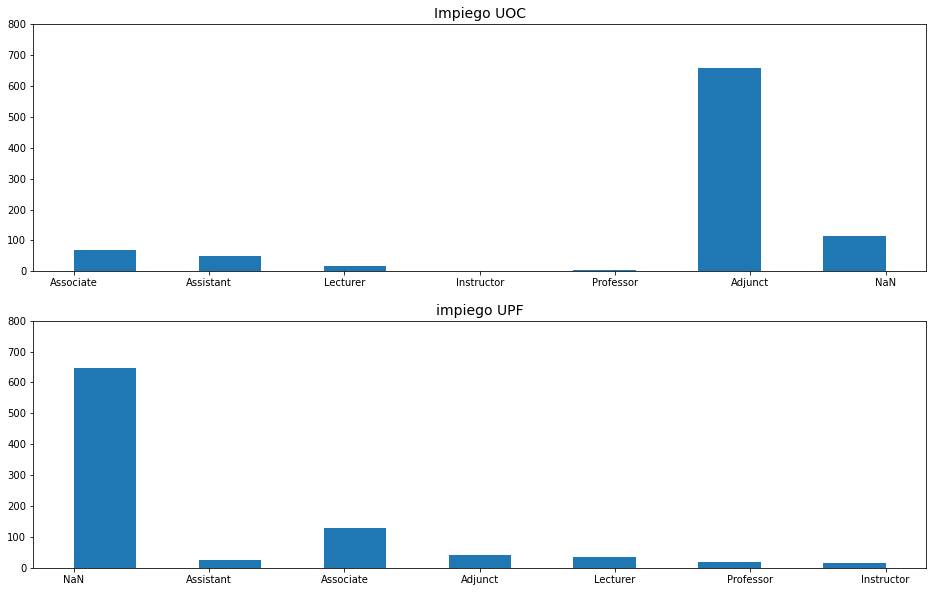

In [8]:
fig = plt.figure(figsize = (16,10))

ax = fig.add_subplot(2, 1, 1)
ax.hist(prof['UOC_POSITION'].fillna(7).astype(int).map({1: "Professor", 2: "Associate", 3: "Assistant", 4: "Lecturer", 5: "Instructor", 6: "Adjunct", 7:'NaN'}), bins = 13)
ax.set_title("Impiego UOC", fontsize = 14)
ax.set_ylim((0, 800))

ax = fig.add_subplot(2, 1, 2)
ax.hist(prof['OTHERSTATUS'].fillna(7).astype(int).map({1: "Professor", 2: "Associate", 3: "Assistant", 4: "Lecturer", 5: "Instructor", 6: "Adjunct", 7:'NaN'}), bins = 13)
ax.set_title("impiego UPF", fontsize = 14)
ax.set_ylim((0, 800))

### Pulizia degli attributi e cambio dtype

I valori nulli relativi agli anni di esperienza possono essere interpretati come l'assenza di questi ultimi.

I valori nulli relativi al dominio e alla registrazione sono solo 5 e possono essere eliminati, avendo infatti un dataset da 913 campioni l'eliminazione di questi 5 non variano alterano la natura del set.

In [9]:
# se non specificato considero gli anni di esperienza = 0
prof['YEARSEXP'] = prof['YEARSEXP'].fillna(0)

# eliminazione righe con domain e userwiki na
prof = prof[prof['DOMAIN'].notna() & prof['USERWIKI'].notna()]

# cambio dei tipi
prof = prof.astype({'AGE': 'int8','GENDER': 'int8','DOMAIN': 'int8','PhD': 'bool','YEARSEXP': 'int8','UNIVERSITY': 'int8','USERWIKI': 'bool'})

#quanti campioni rimanenti
prof.shape

(907, 10)

### Incongruenze nel dataset

Gli attributi "OTHER", "OTHER_POSITION" della descrizione non corrispondono a quelli presenti nel DataFrames:
 - __"OTHER"__ - non è presente;
 - __"OTHER_POSITION"__ - non rispecchia i valori attesi.

L'attributo "OTHER_POSITION" del dataset presenta solo due valori, ___1___ e ___2___, questi risultano essere associabili all' attributo "OTHER" nella descrizione.

In [10]:
prof['OTHER_POSITION'].dropna().astype(int).describe()

count    648.000000
mean       1.586420
std        0.492855
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: OTHER_POSITION, dtype: float64

Nel dataset è presente un'altra colonna che non viene descritta sul sito, ovvero "OTHERSTATUS".
I dati di quest'ultima vanno da un minimo di ___1___ a un massimo di ___7___ e risultano essere associabili ai valori attesi dall'attibuto "OTHER_POSITION" del sito, ad esclusione del valore 7.

In [11]:
prof['OTHERSTATUS'].dropna().astype(int).describe()

count    372.000000
mean       4.201613
std        2.223302
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        7.000000
Name: OTHERSTATUS, dtype: float64

### Assunzioni

Assumiamo come veritiere le supposizioni precedenti e associamo i vari attributi alle colonne nel dataset:
- "OTHER" (sito) -> "OTHER_POSITION" (dataset)
- "OTHER_POSITION" (sito) -> "OTHERSTATUS" (dataset)

Il valore ___7___ presente nell'attributo "OTHERSTATUS" verrà interpretato come "Altro" e perciò specificherà una posizione lavorativa non in elenco.

In [12]:
prof['OTHERSTATUS'].dropna().astype(int)[prof['OTHERSTATUS'].dropna().astype(int)[:] == 7].count()

106

L'attributo "OTHER_POSITION" inoltre ha maggior parte dei dati mancanti, infatti questa variabile descrive il "lavoro come part-time in un'altra università e membri UPF".
Possiamo affermare che questa domanda è mal progettata in quanto non è applicabile alla maggior parte dei membri della facoltà e che quindi non hanno risposto.

In [13]:
# quanti prof non sono assunti da UOC
prof[prof['UNIVERSITY'] == 2].shape

(112, 10)

In [14]:
#tutti i professori non associati a UPF non hanno un ruolo in "UOC_POSITION", il ruolo ricoperto è descritto in "OTHERSTATUS"
pd.DataFrame({ 'contain na ': prof[prof['UNIVERSITY'] == 2].isna().any() ,'number of na ': prof[prof['UNIVERSITY'] == 2].isna().sum() })

,contain na,number of na
AGE,False,0
GENDER,False,0
DOMAIN,False,0
PhD,False,0
YEARSEXP,False,0
UNIVERSITY,False,0
UOC_POSITION,True,112
OTHER_POSITION,True,112
OTHERSTATUS,True,5
USERWIKI,False,0


A conferma di quanto affermato poco sopra, analizzando l'attributo "OTHER_POSITION" si può notare come nel dataset alcuni professori di UOC hanno un altro impiego presso altre facoltà, mentre nessuno dei professori UPF ne ha

In [15]:
other_pos = prof[(prof["OTHER_POSITION"].notna())].fillna(0).astype(int)

#prof di UOC con un altro impiego presso un'altra università
other_pos.loc[(other_pos['OTHER_POSITION'] == 1) & (other_pos['UNIVERSITY'] == 1)]["OTHERSTATUS"].count()

268

In [16]:
#prof di UPF con un altro impiego presso un'altra università
other_pos.loc[(other_pos['OTHER_POSITION'] == 1) & (other_pos['UNIVERSITY'] == 2)]["OTHERSTATUS"].count()


0

### Valutazione NaN su "UOC_POSITION", "OTHERSTATUS", "OTHER_POSITION"

Un'altra osservazione che possiamo eseguire su questi attributi l'analisi sugli NaN.

In [17]:
pd.DataFrame({ 'contain na ': prof[["UOC_POSITION", "OTHERSTATUS", "OTHER_POSITION"]].isna().any() ,'number of na ': prof[["UOC_POSITION", "OTHERSTATUS", 'OTHER_POSITION']].isna().sum() })

,contain na,number of na
UOC_POSITION,True,112
OTHERSTATUS,True,535
OTHER_POSITION,True,259


Queste tre informazioni presentano un elevato numero di NaN, per questo motivo l'operazione di `fillna()` è estremamente sconsigliata. Questa altererebbe la natura dei dati, andando a creare valutazioni errate nelle fasi successive dello studio e per questo motivo l'unica soluzione percorribile è quella dell' dell'eliminazione netta.

### Costruzione attributo POSITION

Prima di eliminare dal dataset le colonne citate poco sopra, è possibile recuperare una parte di informazione grazie alla combinazione delle tre colonne.

L' attributo "UNIVERSITY" indica l'università di appartenenza, a seconda dei valori infatti:
- se 1 -> il prof. ha un ruolo in UOC
- se 2 -> il prof. o ha un ruolo un ruolo in UPF o in un'altra università

Dagli studi e dalle analisi precedenti abbiamo osservato come le informazioni sulla posizione lavorativa di un professore sia enunciata negli attributi "UOC_POSITION" e "OTHERSTATUS" per i dipendenti di UOC e solo nell'attributo "OTHERSTATUS" per i dipendenti UPF.

Sfruttando questa conoscenza è possibile ottenere un nuovo attributo "POSITION" che descriverà la posizione di maggior rilievo ricoperta dal professore combinando le informazioni presenti nelle varie colonne.

In [18]:
prof['UOC_POSITION'] = prof['UOC_POSITION'].fillna(0).astype(int)
prof['OTHERSTATUS'] = prof['OTHERSTATUS'].fillna(0).astype(int)
prof['OTHER_POSITION'] = prof['OTHER_POSITION'].fillna(0).astype(int)

# sostituzione del val 7/"Altro" con 0 per sfruttare la UFunc max()
prof['OTHERSTATUS'][ prof['OTHERSTATUS'] > 6] = 0

<ipython-input-18-f60dfb56dc25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof['OTHERSTATUS'][ prof['OTHERSTATUS'] > 6] = 0 # considero il 7 come "altro" percio non lo considero


#### Confronto fra UFunc e Funzioni semplici

Come si puo vedere di seguito, il confronto conferma quanto ci aspettavamo. Le funzioni ottimizzate risultano essere molto più veloci rispetto alla funzione scritta con il linguaggio ad alto livello.
l'UFunc risulta essere piu velore del

# 25.8 micros 164 ns per loop ( mean std. dev . of 7 runs , 10000 loops each )
# 25.8 medi del tempo che necessita per fare questa op
# vari run e fa 10000 llops
#164 deviazione standard

In [19]:
# %timeit prof[["UOC_POSITION", "OTHERSTATUS"]].max(axis=1)

In [20]:
# %timeit main.merge_two_series_by_max(prof['OTHERSTATUS'].array, prof['UOC_POSITION'].array)

Grazie a questo confronto tra funzioni, decidiamo di utlizzare la UFunc dato che questa risulta essere piu veloce.

Una volta ottenuta la Series contenente la posizione lavorativa più importante ricoperta da ogni professore, la inseriamo nel dataset ed eliminiamo i 3 attributi utilizzati per costruirla poichè questi presentano un gran numero di NaN.

In [21]:
position = prof[["UOC_POSITION", "OTHERSTATUS"]].max(axis=1).astype('int8')

#inseriamo in ordine la nuova colonna ed eliminiamo 3 colonne
prof.insert(loc=6, column='POSITION', value=position)
prof = prof.drop(columns=['UOC_POSITION', 'OTHERSTATUS', 'OTHER_POSITION'])

# professori che non hanno neanche un ruolo vengono eliminati
prof = prof[prof['POSITION'] != 0]
prof.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 912
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AGE         871 non-null    int8 
 1   GENDER      871 non-null    int8 
 2   DOMAIN      871 non-null    int8 
 3   PhD         871 non-null    bool 
 4   YEARSEXP    871 non-null    int8 
 5   UNIVERSITY  871 non-null    int8 
 6   POSITION    871 non-null    int8 
 7   USERWIKI    871 non-null    bool 
dtypes: bool(2), int8(6)
memory usage: 13.6 KB


Controllando di nuovo il DataFrame "prof" e i suoi valori NaN possiamo affermare di aver eseguito una pulizia completa del dataset perdendo poche informazioni.

In [22]:
# mostra na di prof dopo manuipolazioni
pd.DataFrame({ 'contain na ': prof.isna().any() ,'number of na ': prof.isna().sum() })

,contain na,number of na
AGE,False,0
GENDER,False,0
DOMAIN,False,0
PhD,False,0
YEARSEXP,False,0
UNIVERSITY,False,0
POSITION,False,0
USERWIKI,False,0


------------------------------------------------

## Questionario

Questo sottoinsieme raccoglie risposte al sondaggio rilasciate da ogni professore.
Ogni risposta puo avere un solo valore da 1 a 5, dove __1__: rappresenta "fortemente in disaccordo / mai" e __5__: "fortemente d'accordo / sempre"

Argomento | Nome attributo | Desc
----|------|-------
Utilità percepita | PU1 | L'uso di Wikipedia rende più facile per gli studenti sviluppare nuove competenze
 - | PU2 | L'uso di Wikipedia migliora l'apprendimento degli studenti
 - | PU3 | Wikipedia è utile per l'insegnamento
Facilità d'uso percepita | PEU1| Wikipedia è facile da usare
 - | PEU2 | È facile trovare in Wikipedia le informazioni che cerchi
 - | PEU3 | È facile aggiungere o modificare informazioni in Wikipedia
Piacere percepito | ENJ1| L'uso di Wikipedia stimola la curiosità
 - | ENJ2 | L'uso di Wikipedia è divertente
Qualità | QU1| Gli articoli di Wikipedia sono affidabili
 - | QU2 | Gli articoli di Wikipedia sono aggiornati
 - | QU3 | Gli articoli di Wikipedia sono completi
 - | QU4 | Nella mia area di competenza, Wikipedia ha una qualità inferiore rispetto ad altre risorse educative
 - | QU5 | Ho fiducia nel sistema di editing di Wikipedia
Visibilità | VIS1| Wikipedia migliora la visibilità del lavoro degli studenti
 - | VIS2 | È facile avere un registro dei contributi fatti in Wikipedia
 - | VIS3 | Cito Wikipedia nei miei articoli accademici
Immagine sociale | IM1| L'uso di Wikipedia è ben considerato dai colleghi
 - | IM2 | Nel mondo accademico, la condivisione di risorse educative aperte è apprezzata
 - | IM3 | I miei colleghi usano Wikipedia
Atteggiamento di condivisione | SA1| È importante condividere i contenuti accademici in piattaforme aperte
 - | SA2 | È importante pubblicare i risultati della ricerca in altri media che non siano riviste accademiche o libri
 - | SA3 | È importante che gli studenti acquisiscano familiarità con gli ambienti collaborativi online
Comportamento d'uso | USE1| Uso Wikipedia per sviluppare il mio materiale didattico
 - | USE2 | Uso Wikipedia come piattaforma per sviluppare attività educative con gli studenti
 - | USE3 | Raccomando ai miei studenti di usare Wikipedia
 - | USE4 | Raccomando ai miei colleghi di usare Wikipedia
 - | USE5 | Sono d'accordo che i miei studenti usino Wikipedia nei miei corsi
Profilo 2.0 | PF1| Contribuisco ai blog
 - | PF2 | Partecipo attivamente alle reti sociali
 - | PF3 | Pubblico contenuti accademici in piattaforme aperte
Rilevanza del lavoro | JR1| La mia università promuove l'uso di ambienti collaborativi aperti in Internet
 - | JR2 | La mia università considera l'uso di ambienti collaborativi aperti in Internet come un merito dell'insegnamento
Intenzione comportamentale | BI1| In futuro raccomanderò l'uso di Wikipedia ai miei colleghi e studenti
 - | BI2 | In futuro userò Wikipedia nella mia attività di insegnamento
Incentivi | INC1| Per progettare attività educative utilizzando Wikipedia, sarebbe utile: una guida alle migliori pratiche
 - | INC2 | Per progettare attività educative utilizzando Wikipedia, sarebbe utile: ricevere istruzioni da un collega
 - | INC3 | Per progettare attività educative utilizzando Wikipedia, sarebbe utile: ottenere una formazione specifica
 - | INC4 | Sarebbe utile progettare attività educative usando Wikipedia: maggiore riconoscimento istituzionale
Esperienza | EXP1| Consulto Wikipedia per questioni relative al mio campo di competenza
 - | EXP2 | Consulto Wikipedia per altre questioni accademiche
 - | EXP3 | Consulto Wikipedia per questioni personali
 - | EXP4 | Contribuisco a Wikipedia (edizioni, revisioni, miglioramento degli articoli...)
 - | EXP5 | Uso i wiki per lavorare con i miei studenti

Prima di procedere con l'analisi del set di dati verranno eliminate i campioni dei professori non più presenti nel dataset grazie all'utilizzo degli Index

In [23]:
#escludo le domande relative ai professori non più presenti
questionario = questionario.loc[prof.index]

#stampa degli NaN per ogni attributo
pd.DataFrame({ 'contain na ': questionario.isna().any() ,'number of na ': questionario.isna().sum() })

,contain na,number of na
PU1,True,6
PU2,True,10
PU3,True,4
PEU1,True,4
PEU2,True,14
PEU3,True,92
ENJ1,True,6
ENJ2,True,17
Qu1,True,7
Qu2,True,10


### Grafici

Per avere una visione più puntale del sottoinsieme in lavorazione risulta essere vantaggioso la costruzione di plot descrittivi.


Come possiamo vedere dai grafici, la maggior parte delle domande ha una distribuzione quasi normale, con la maggior parte delle risposte concentrate tra 2, 3 e 4.
Risultano essere presenti alcune domande sulle quali sono presenti molti valori rappresentati il disaccordo, è il caso Use1, Use2, Vis3 e Exp5.
Queste domande, riferendosi all'uso di wikipedia per l'elaborazione di materiale e attività educative, risultano essere molto interessanti ai fini dello studio e forniscono un indicazione sull'opinione di una buona parte dei professori.


### Ricodifica QU4

Analizzando le domande relative al questionario si è notato che la domanda QU4 ("Nella mia area di competenza, Wikipedia ha una qualità inferiore rispetto ad altre risorse educative") è posta in maniera non coerente rispetto alle altre.

In questa specifica domanda una risposta con valore 5 esprime un giudizio negativo, per questo motivo eseguiremo una ricodifica delle risposte cosi da ottenere una maggiore linearità.

#### Confronto fra UFunc e Funzioni semplici

Per operare questo tipo di codifica era necessario operare su tutta la Series, questo ha permesso di confrontare i diversi approcci possibili.
Nel primo caso si è utilizzata la funzione built-in `.map()` disponibile nella libreria Pandas, nel secondo la funzione utilizza UFuncs adatte alla manipolazione delle series mentre l'ultima consiste in un ciclo su tutta la Series dove per ogni elemento si applica una funzione lambda che simula la map() del primo test

In [24]:
#trasformo per facilitare il test
questionario['Qu4'] = questionario['Qu4'].fillna(0).astype(int)


In [25]:
# funzione built|in
# %timeit questionario['Qu4'].map({1:5, 2:4, 3:3, 4:2, 5:1})

`def reverse_vote_uf(s):

    v1 = s.mask(s == 1, 5)
    v2 = s.mask(s == 2, 4)
    v3 = s.mask(s == 3, 3)
    v4 = s.mask(s == 4, 2)
    v5 = s.mask(s == 5, 1)

    v3 = v3.combine(v1, max)
    v3 = v3.combine(v2, max)
    v3 = v3.combine(v4, max)
    v3 = v3.combine(v5, max)

    return v3`

In [26]:
# mask e combine
# %timeit main.reverse_vote_uf(questionario['Qu4'])

`def switch(e):
    switcher = {
        0: 0,
        1: 5,
        2: 4,
        3: 3,
        4: 2,
        5: 1
    }
    return switcher.get(e, lambda: "Invalid")


def reverse_vote_not_uf(s):
    list = []
    for i in range(s.size):
        list.append(switch(s[i]))
    return list`

In [27]:
# foreach con funzione switcher che utilizza map
# %timeit main.reverse_vote_not_uf(questionario['Qu4'].array)

Il risultato sorprende in parte, questo infatti conferma che la funzione `.map()` di pandas è la più veloce ed ottimizzata ma mostra come il secondo approccio sia meno efficiente rispetto all'ultimo.
Questo risultato ci permette di fare riflessioni sulle `lambda` function, queste infatti risultano essere molto efficienti rispetto alle normali funzioni quasi quanto le `.map()`

In [28]:
questionario['Qu4'] = questionario['Qu4'].map({0:np.nan, 1:5, 2:4, 3:3, 4:2, 5:1})

### Pulizia degli attributi e cambio dtype

Tutti gli attributi, come visto in precedenza, possiedono almeno un NaN. Stampare il numero dei campioni coinvolti con nessun NaN è utile a capire quanto questo fenomeno abbia peso sul dataset.

In [29]:
# lo mostro soltanto per vedere quante sono le righe complete
questionario.dropna().shape

(596, 43)

Una semplice esclusione delle osservazioni (righe) con NaN nelle risposte del sondaggio rimuove circa 300 osservazioni. Questo è circa 1/3 del set di dati ed è una parte abbastanza significativa dei dati perciò si cercherà un altro approccio per ottenere un dataset completamente pulito.

#### Diversi approcci per pulizia

A seguito delle analisi sul dataset, le opzioni applicabili sono 3:

- eliminare riga solo se ha n risposte mancanti, con n valore arbitrario
- sostituire gli NaN con un valore specifico, ad esempio 0 o 6
- sostituire gli NaN con la mediana

La prima soluzione non risulta essere percorribile, ogni risposta alle domande può risultare importante ai fini dello studio. Ad esempio, eliminare una riga nel caso in cui il professore non abbia risposto ai quesiti "USE" quando questi sono quelli da predirre eliminerebbe campioni utili al dataset

la seconda opzione risulterebbe interessante qualora il dataset non dovesse essere utilizzato per il ML, introdurre nuovi valori numerici che non hanno un reale riscontro con le domande effettuate porterebbe possibili comportamenti inattesi da parte degli algoritmi.

La soluzione migliore risulta essere l'ultima anche se non risulterà possibile effettuare un'analisi sul motivo per cui i dati sono nulli.

In [30]:
# sfruttiamo le lamda function grazie alle osservazioni precedenti
questionario = questionario.apply(lambda x: x.fillna(x.median()),axis=0)
questionario = questionario.astype('int8')

pd.DataFrame({ 'contain na ': questionario.isna().any() ,'number of na ': questionario.isna().sum() })

,contain na,number of na
PU1,False,0
PU2,False,0
PU3,False,0
PEU1,False,0
PEU2,False,0
PEU3,False,0
ENJ1,False,0
ENJ2,False,0
Qu1,False,0
Qu2,False,0


In [31]:
questionario.describe()

,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.00000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,3.137773,3.150402,3.450057,4.347876,4.049369,3.330654,3.800230,3.828932,3.196326,3.415614,2.975890,2.771527,3.027555,2.955224,3.068886,2.029851,2.458094,3.293915,2.890930,4.187141,4.136625,4.392652,2.104478,1.820896,2.660161,2.535017,3.303100,2.264064,2.856487,2.544202,3.722158,3.127440,2.95752,3.000000,3.783008,3.501722,3.444317,3.528129,2.991963,3.489093,3.652124,1.572905,2.478760
std,0.998543,0.976327,1.042531,0.786081,0.817114,0.872815,0.962062,0.868021,0.861320,0.850657,0.855337,1.069716,0.940371,0.866525,0.799329,1.146320,0.960256,1.026521,0.968847,0.839058,0.946100,0.794892,1.082511,1.060286,1.197415,1.168889,1.075314,1.270924,1.305629,1.292795,1.068226,1.170938,1.03359,1.073184,1.069960,1.105757,1.129057,1.164149,1.176857,1.103623,1.111897,0.937789,1.336214
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,4.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.00000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,3.00000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,1.000000,2.000000
75%,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Preparazione modello ML

In [32]:
#riuniamo il dataset
data = pd.concat([prof,questionario], axis=1)
data

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,POSITION,USERWIKI,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,True,14,1,2,True,4,4,3,5,5,3,4,4,3,3,2,4,3,3,3,1,2,4,2,4,4,4,3,1,1,2,4,1,1,3,4,1,2,3,5,5,5,5,4,4,4,1,2
1,42,0,5,True,18,1,2,True,2,3,3,4,4,3,3,4,4,4,3,3,2,3,3,1,1,2,1,4,4,4,2,2,1,1,2,1,1,1,4,3,2,2,4,4,3,4,2,2,4,2,4
2,37,0,4,True,13,1,3,True,2,2,2,4,4,3,3,3,2,2,2,1,3,2,3,2,2,4,3,4,2,4,1,1,1,1,1,3,3,3,4,3,1,1,5,3,5,5,2,2,2,1,3
3,40,0,4,False,13,1,3,True,3,3,4,3,3,3,4,3,3,4,3,3,3,3,4,3,2,2,3,5,5,5,3,3,3,3,3,4,4,4,5,4,3,3,3,4,4,3,4,4,3,3,4
4,51,0,6,False,8,1,3,True,4,3,5,5,4,3,4,4,4,5,4,3,4,4,4,4,3,2,3,5,5,5,3,3,5,5,5,5,5,5,3,3,5,5,5,5,4,4,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,True,21,2,2,True,3,3,3,5,5,2,4,5,3,3,4,1,2,2,2,1,2,2,2,3,3,4,2,1,2,2,2,1,2,1,5,4,2,2,2,2,2,2,3,4,4,1,2
909,53,0,6,False,25,2,6,True,3,3,4,5,4,3,4,4,4,4,4,3,3,2,3,3,2,3,2,4,4,5,3,2,3,3,5,2,2,4,3,3,4,4,4,3,3,4,4,4,4,1,1
910,39,0,5,True,9,2,4,True,3,3,3,5,4,3,3,4,3,3,2,1,2,2,4,1,1,2,3,4,5,4,3,1,1,1,3,5,5,3,3,1,2,2,5,4,3,4,5,5,5,4,1
911,40,0,3,True,10,2,2,True,3,3,5,5,4,2,4,4,4,4,3,4,5,3,2,5,4,5,4,5,5,5,3,1,5,5,3,1,2,4,4,2,5,5,1,5,2,2,4,4,2,1,1


In [33]:
#normalizza colone
#one note encoding

In [34]:










# jupyter nbconvert --execute --to pdf wiki4HE.ipynb